In [4]:
import numpy as np
import matplotlib.pyplot as plt

$$y=\beta_0 + \beta_1 x +\beta_2 x^2+ \epsilon$$ 

Loss function = $$L=\sum(y_i-\hat{y_i})^2+\lambda \beta_2^2$$

In [5]:
# Step 1: Generate synthetic data
np.random.seed(0)
n = 100
x = np.linspace(-3, 3, n)
true_beta = np.array([1.0, 2.0, -0.5])
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.normal(0, 1, size=n)

# Step 2: Define the model
def model(x, beta):
    return beta[0] + beta[1] * x + beta[2] * x**2

# Step 3: Define loss with ridge penalty on beta2
def loss(beta, x, y, lam):
    y_pred = model(x, beta)
    mse = np.mean((y - y_pred)**2)
    ridge = lam * beta[2]**2
    return mse + ridge

# Step 4: Compute gradient of the loss
def gradient(beta, x, y, lam):
    y_pred = model(x, beta)
    error = y_pred - y
    grad = np.zeros(3)
    grad[0] = 2 * np.mean(error)
    grad[1] = 2 * np.mean(error * x)
    grad[2] = 2 * np.mean(error * x**2) + 2 * lam * beta[2]
    return grad

# Step 5: Gradient descent algorithm
def gradient_descent(x, y, lam=0.1, lr=0.01, epochs=1000):
    beta = np.random.randn(3)
    for i in range(epochs):
        grad = gradient(beta, x, y, lam)
        beta -= lr * grad
        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss(beta, x, y, lam):.4f}")
    return beta

# Step 6: Estimate parameters
lambda_reg = 1.0
estimated_beta = gradient_descent(x, y, lam=lambda_reg, lr=0.01, epochs=1000)

Epoch 0: Loss = 34.9856
Epoch 100: Loss = 1.1326
Epoch 200: Loss = 0.9913
Epoch 300: Loss = 0.9692
Epoch 400: Loss = 0.9657
Epoch 500: Loss = 0.9652
Epoch 600: Loss = 0.9651
Epoch 700: Loss = 0.9651
Epoch 800: Loss = 0.9651
Epoch 900: Loss = 0.9651


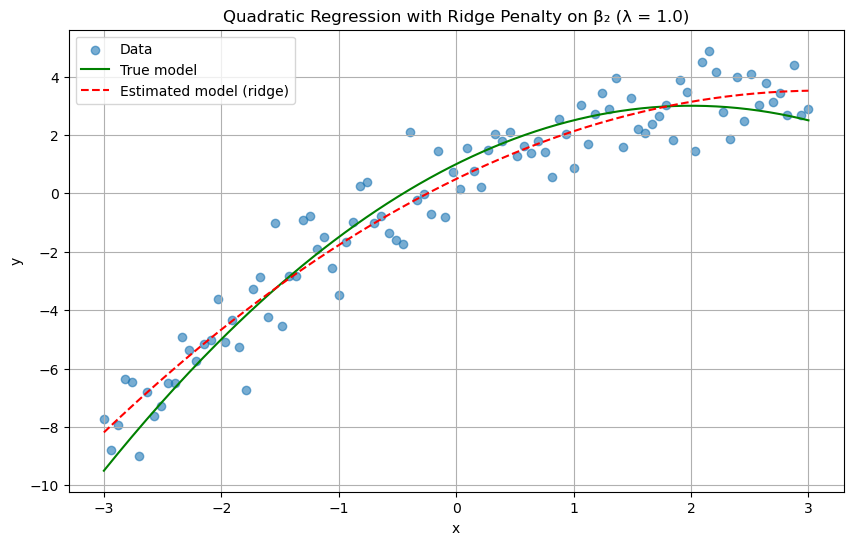

Estimated β: [ 0.49121068  1.95044552 -0.31419926]


In [6]:
# Step 7: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", alpha=0.6)
x_plot = np.linspace(min(x), max(x), 200)
y_true = model(x_plot, true_beta)
y_est = model(x_plot, estimated_beta)
plt.plot(x_plot, y_true, label="True model", color="green")
plt.plot(x_plot, y_est, label="Estimated model (ridge)", color="red", linestyle="--")
plt.legend()
plt.title(f"Quadratic Regression with Ridge Penalty on β₂ (λ = {lambda_reg})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Print estimated parameters
print("Estimated β:", estimated_beta)

In [8]:
true_beta, estimated_beta

(array([ 1. ,  2. , -0.5]), array([ 0.49121068,  1.95044552, -0.31419926]))